## Exploratory Data Analysis of CoVID-19 Patients Dataset by Johns Hopkins University - Kushagra Gupta

In this Jupyter notebook, we will perform EDA on the Corona Virus dataset which contains datewise entries of 188 countries, specifying their latitude, longitude, type of cases and the number of cases recorded on that day. The dataset has entries from 22nd January 2020 to 27th July 2020

From this EDA, we can answer questions like:-
* Which are the 5 most affected countries in the world?
* Does latitude and longitude affect the amount of cases?
* Which country has the highest death and recovery rate?
* Which date of every month recorded the highest number of cases in the world?
* Are the different parameters dependent on each other? (*using corelation heatmaps*)


The graphs are also plotted for data visualization, using the Seaborn and Matplotlib libraries.

### Step 1: Data Cleaning

In [255]:
#Importing the necessary modules

import pandas as pd #for manipulating and working with dataset
import numpy as np #for performing mathematical calculations
import seaborn as sns #for data visualizations
import matplotlib.pyplot as plt #for plotting graphs

In [256]:
#Importing the dataset and storing it in variable named 'data     ' 

data = pd.read_csv("coronavirus.csv")

In [257]:
#Showing the first 5 entries of the dataset

data.head()

,date,province,country,lat,long,type,cases
0,22-01-2020,NaN,Afghanistan,33.93911,67.709953,confirmed,0
1,23-01-2020,NaN,Afghanistan,33.93911,67.709953,confirmed,0
2,24-01-2020,NaN,Afghanistan,33.93911,67.709953,confirmed,0
3,25-01-2020,NaN,Afghanistan,33.93911,67.709953,confirmed,0
4,26-01-2020,NaN,Afghanistan,33.93911,67.709953,confirmed,0


In [4]:
#Showing the last 5 entries of the dataset

data.tail()

,date,province,country,lat,long,type,cases
147575,23-07-2020,Zhejiang,China,29.1832,120.0934,recovered,0
147576,24-07-2020,Zhejiang,China,29.1832,120.0934,recovered,0
147577,25-07-2020,Zhejiang,China,29.1832,120.0934,recovered,1
147578,26-07-2020,Zhejiang,China,29.1832,120.0934,recovered,0
147579,27-07-2020,Zhejiang,China,29.1832,120.0934,recovered,0


In [5]:
#Showing mean, standard deviation, total count and min-max values of the dataset

data.describe()

,lat,long,cases
count,147580.000000,147580.000000,147580.000000
mean,20.676502,24.494931,180.972361
std,24.735890,69.200863,1793.111927
min,-51.796300,-135.000000,-16298.000000
25%,6.611100,-12.885800,0.000000
50%,22.166700,21.745300,0.000000
75%,40.182400,80.771797,5.000000
max,71.706900,178.065000,140050.000000


In [6]:
data.shape

(147580, 7)

Here we can see we have 147580 rows and 7 columns in our dataset

In [7]:
data.columns

Index(['date', 'province', 'country', 'lat', 'long', 'type', 'cases'], dtype='object')

In [8]:
data.isnull().sum()

date             0
province    104528
country          0
lat              0
long             0
type             0
cases            0
dtype: int64

There are 104,528 entries with province as the NULL value

In [9]:
data = data.fillna('Unknown')
data.isnull().sum()

date        0
province    0
country     0
lat         0
long        0
type        0
cases       0
dtype: int64

Replacing all null values with "Unknown"

### Step 2: Finding relationship of different parameters

<AxesSubplot:>

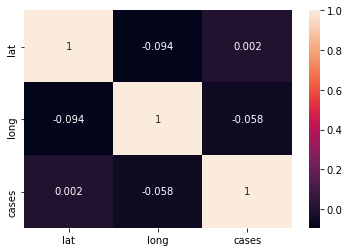

In [10]:
#Relationship analysis using Seaborn heatmaps

corelation = data.corr()
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

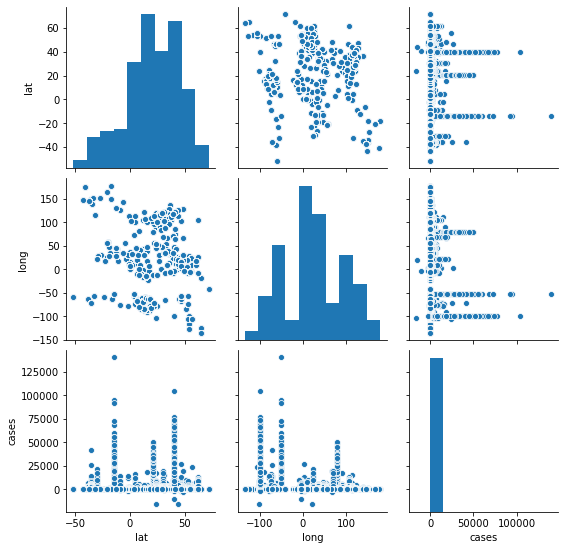

In [11]:
#Using Seaborn library for graphing various columns with one another

sns.pairplot(data)

### Observations from the graph:-
* We can observe from the above graph (cases vs latitude) that the regions with latitude in the range -10 to -20 had a lot of cases, signifying that *people were most affected in the torrid zone.*
* We can observe from the above graph (cases vs longitude) that the regions with longitude in the range -50 to -100 had a lot of cases, signifying that *people were most affected in the United States of America,* which is a country falling in this longitude range.

### Step 3: Data Visualization

Text(0.5, 1.0, 'Trend of no. cases w.r.t months')

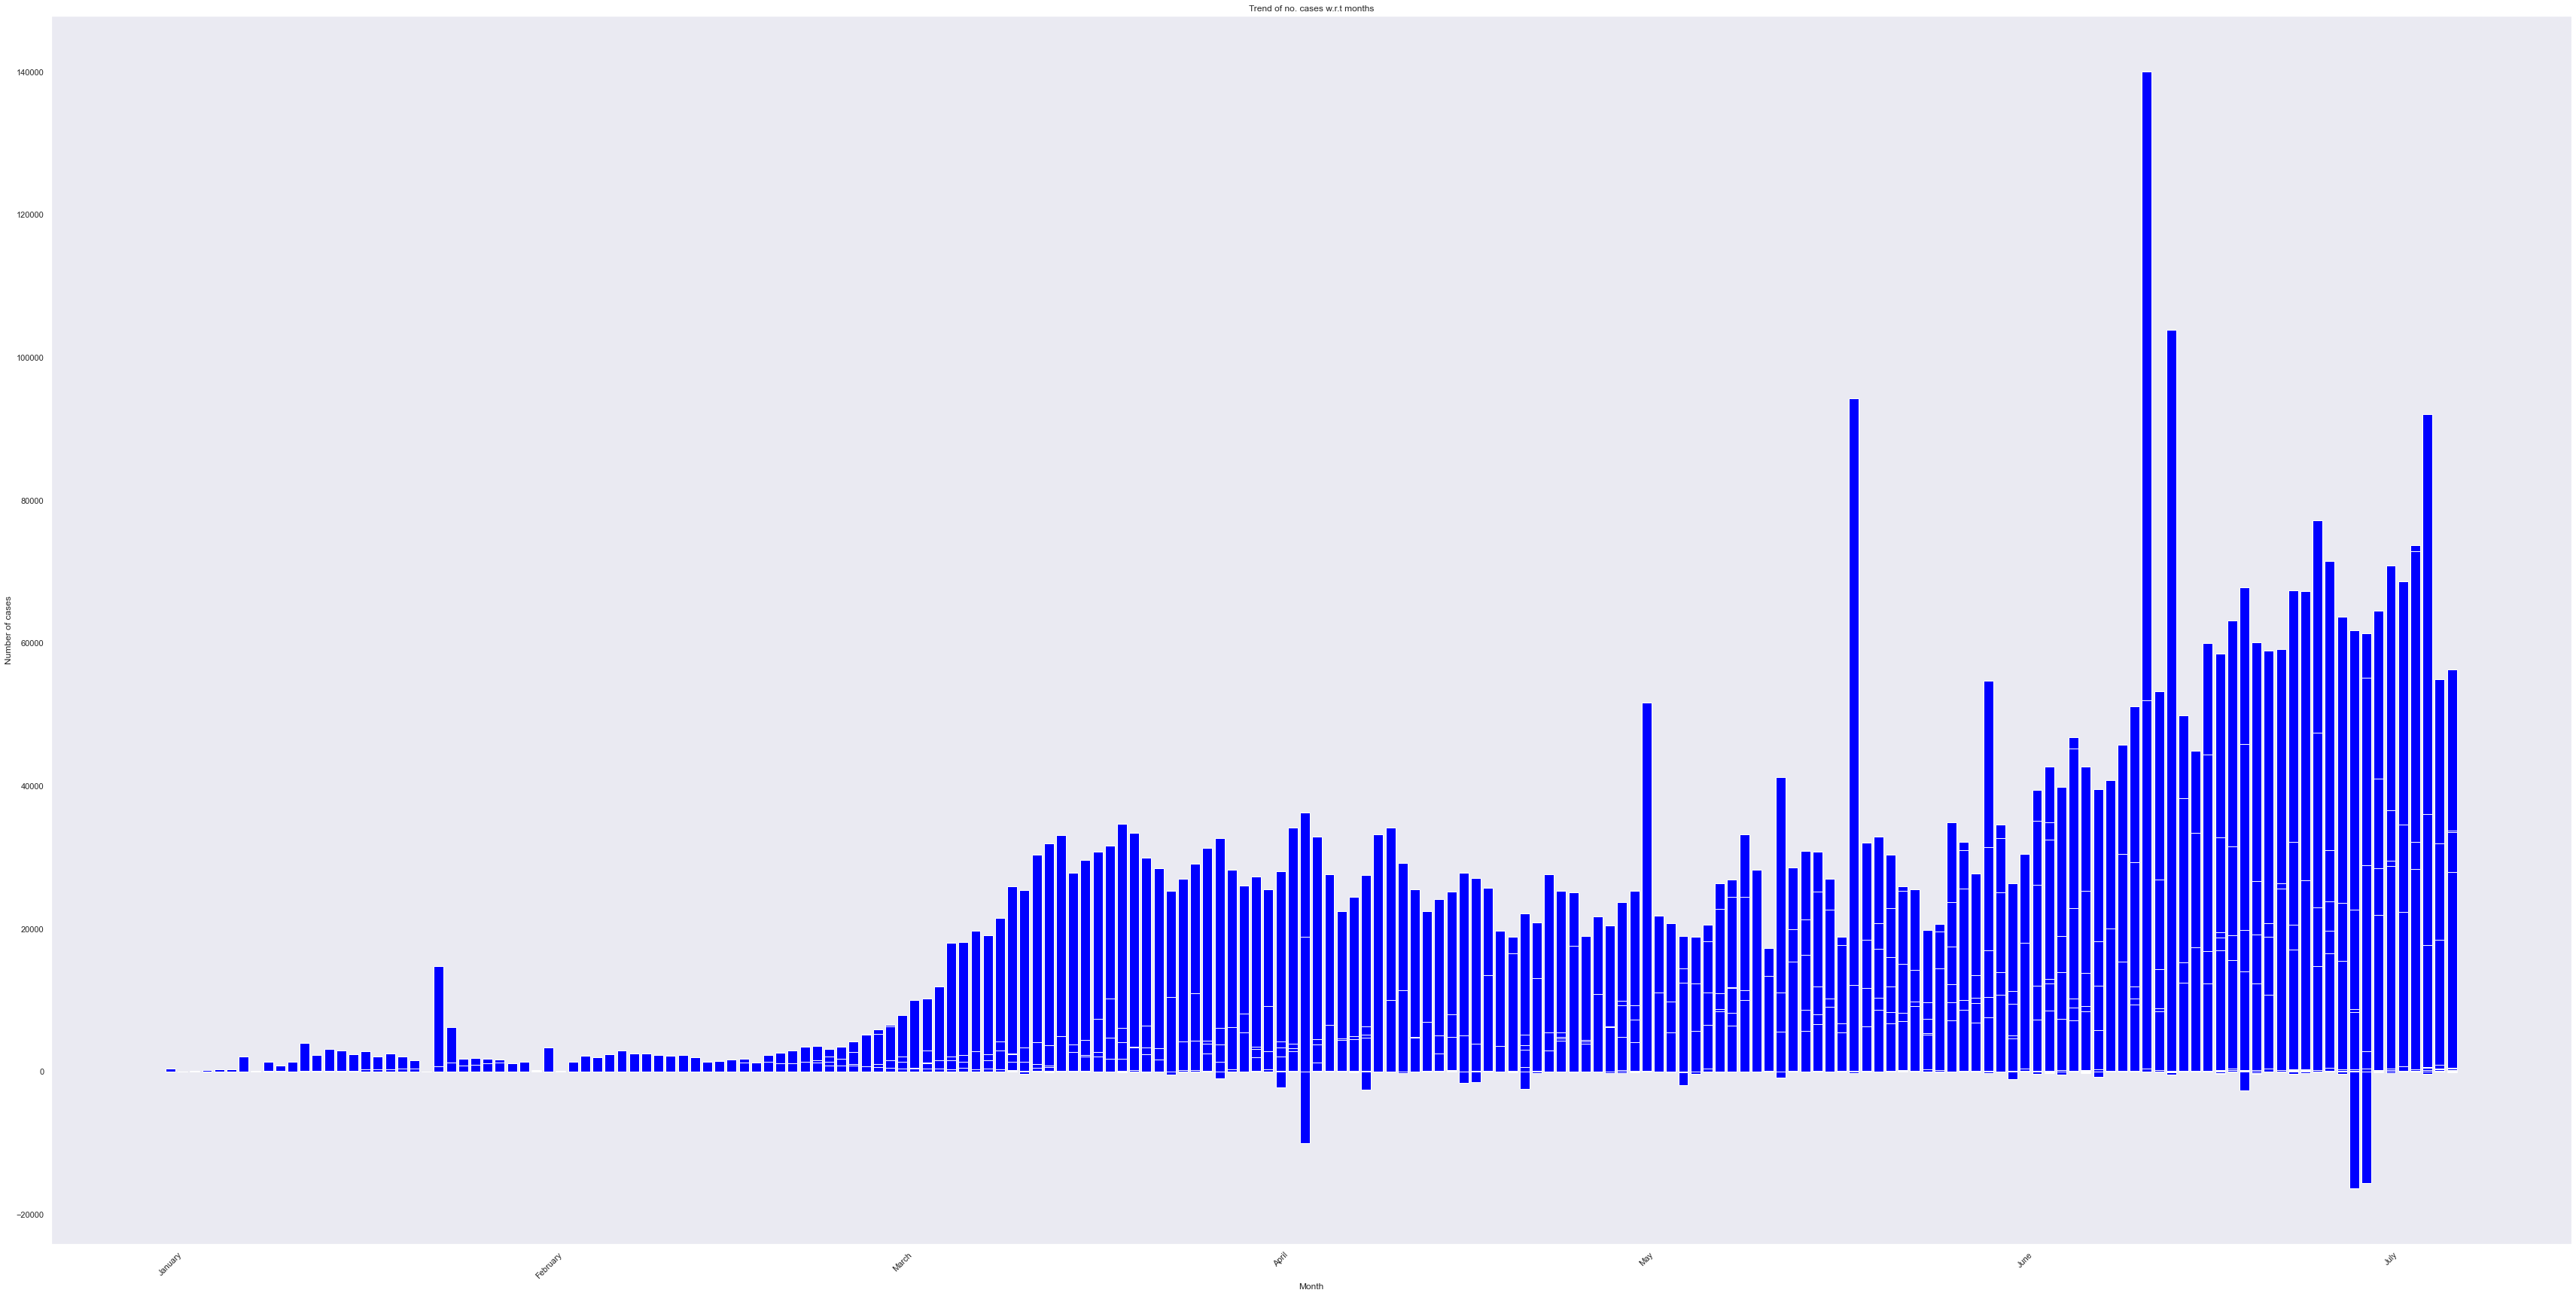

In [272]:
plt.figure(figsize=(60,30))
plt.bar(data['date'], data['cases'], color='blue')
plt.xlabel("Month")
plt.xticks(['22-01-2020','22-02-2020','22-03-2020','22-04-2020','22-05-2020','22-06-2020','22-07-2020'],
           ['January','February','March','April','May','June','July'],rotation=45)
plt.ylabel("Number of cases")
plt.title("Trend of no. cases w.r.t months")

### Observations from the graph:-
* The bar graph shows the number of cases in the world have significantly increased as we progressed from January to July.
* There was a spike between the month of June and July, with almost 140,000 cases in just one day.

<AxesSubplot:ylabel='cases'>

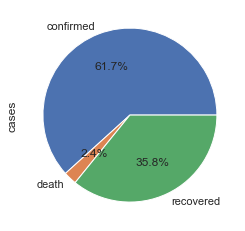

In [308]:
data.groupby('type')['cases'].sum().plot(kind="pie",autopct='%1.1f%%',figsize=(20,4))

### Observations from the graph:-
* There are about 16 Million cases worldwide as of 27 July 2020 *(61.7%)*
* About 10 Million of them have recovered *(35.8%)* .
* However, there are less than 1 Million deaths worldwide. Which tells that the COVID-19 is infectious, but not always fatal *(2.4%)* .

<AxesSubplot:xlabel='country'>

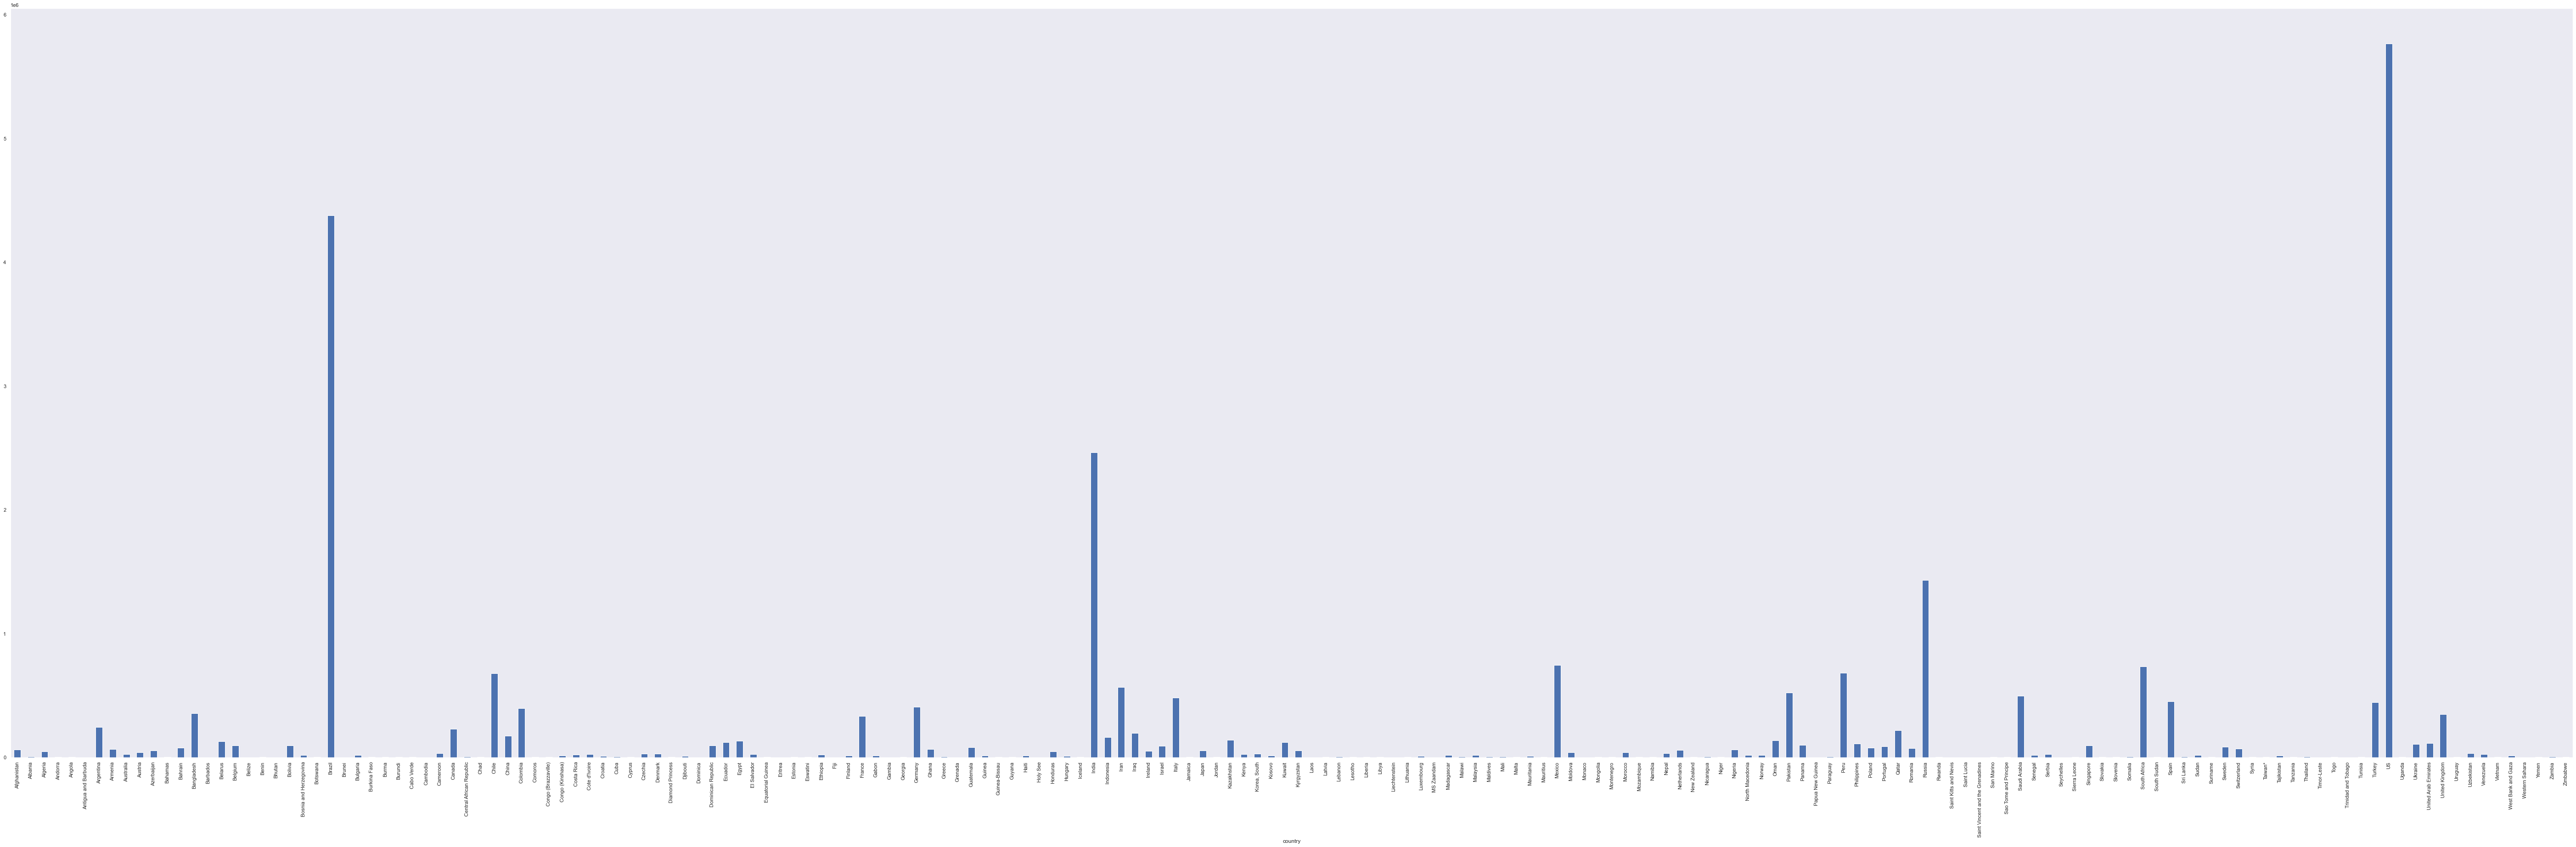

In [53]:
data.groupby('country')['cases'].sum().plot(kind='bar',figsize=(100,30))

### Observation from the above graph:-
* The countries with most number of cases is USA, Brazil, India, Mexico, and Russia till 27th July 2020.

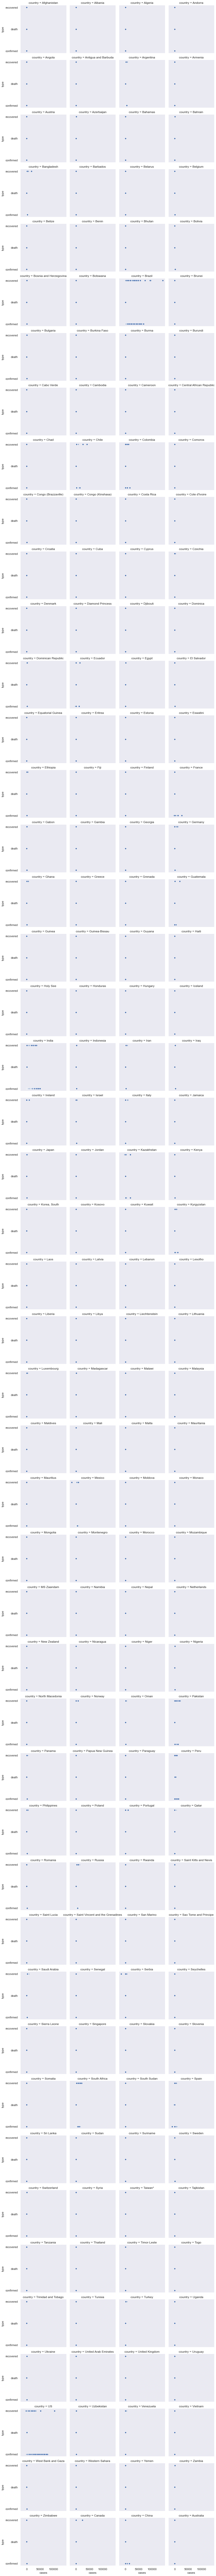

In [70]:
#Scatter plot for number of cases by type for each country

cond_plot = sns.FacetGrid(data=data, col='country', col_wrap=4)
cond_plot.map(sns.scatterplot, 'cases', 'type')

### Making a new dataframe
For our ease, we will make 3 more columns namely - confirmed, death, and recovered. We will then show the total values of them against all the 188 countries in the dataset.

In [328]:
contlst = list(data['country'].unique())
print(contlst)
df1 = data

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Chile', 'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 

The above cell shows the list of all the 188 countries in the dataset.

In [291]:
# To find death, recovered, confirmed cases for all countries

dl=[]
rl=[]
cl=[]

for j in range(0,len(contlst)): 
    d=0 #deaths
    r=0 #recovered
    c=0 #confirmed
    for i in range(0,len(df1)):
        if (df1.country[i]==contlst[j] and df1.type[i]=='death'):
            d = d + df1.death[i]
        elif (df1.country[i]==contlst[j] and df1.type[i]=='recovered'):
            r = r + df1.recovered[i]
        elif (df1.country[i]==contlst[j] and df1.type[i]=='confirmed'):
            c = c + df1.confirmed[i]

    dl.append(d)
    rl.append(r)
    cl.append(c)

details = { 
    'Country' : contlst, 
    'Confirmed' : cl, 
    'Death' : dl,
    'Recovered' : rl
} 
  
# creating a Dataframe object  
df2 = pd.DataFrame(details, columns = ['Country', 'Confirmed', 
                                      'Death','Recovered'])
df2

,Country,Confirmed,Death,Recovered
0,Afghanistan,36263,1269,25198
1,Albania,4880,144,2745
2,Algeria,27973,1163,18837
3,Andorra,907,52,803
4,Angola,950,41,242
...,...,...,...,...
183,Zambia,4552,140,2815
184,Zimbabwe,2704,36,542
185,Canada,116471,8945,101447
186,China,86783,4656,80466


Text(0.5, 1.0, 'No. of deaths per country')

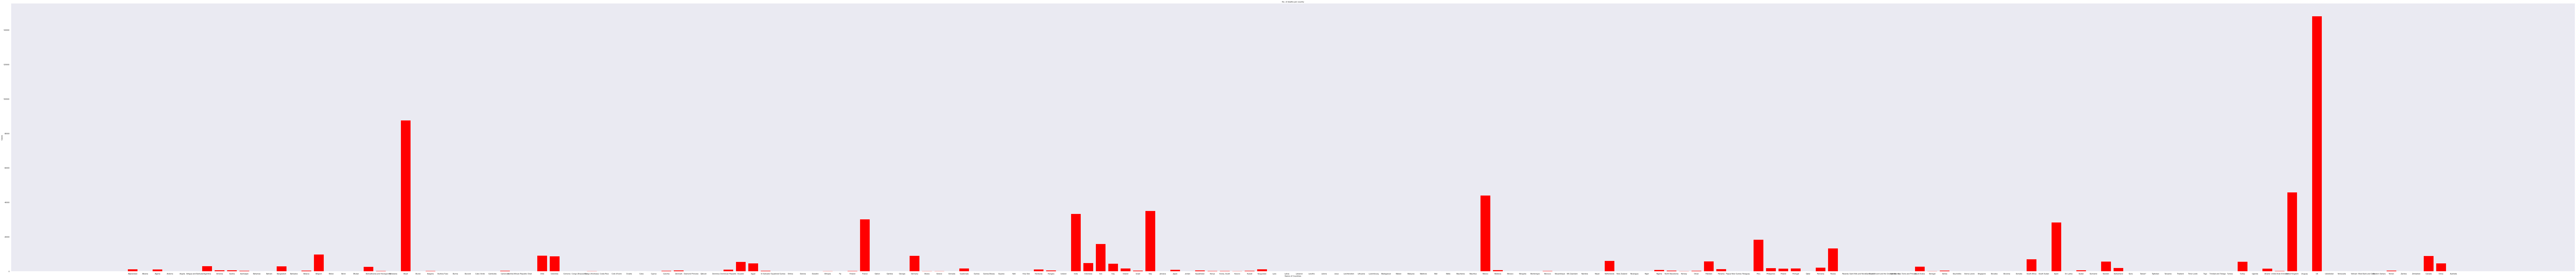

In [329]:
plt.figure(figsize=(280,30))
plt.bar(details['Country'], details['Death'],color='red')
plt.xlabel("Name of Countries")
plt.ylabel("Cases")
plt.title("No. of deaths per country")

Text(0.5, 1.0, 'No. of recovered cases per country')

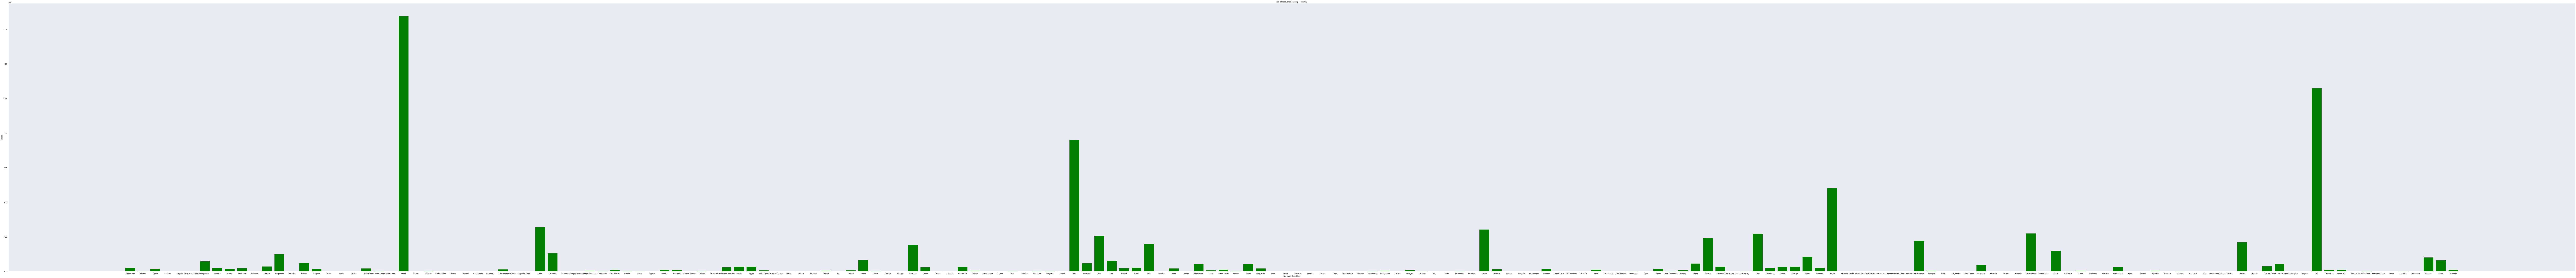

In [311]:
plt.figure(figsize=(280,30))
plt.bar(details['Country'], details['Recovered'],color='green')
plt.xlabel("Name of Countries")
plt.ylabel("Cases")
plt.title("No. of recovered cases per country")

Text(0.5, 1.0, 'No. of confirmed cases per country')

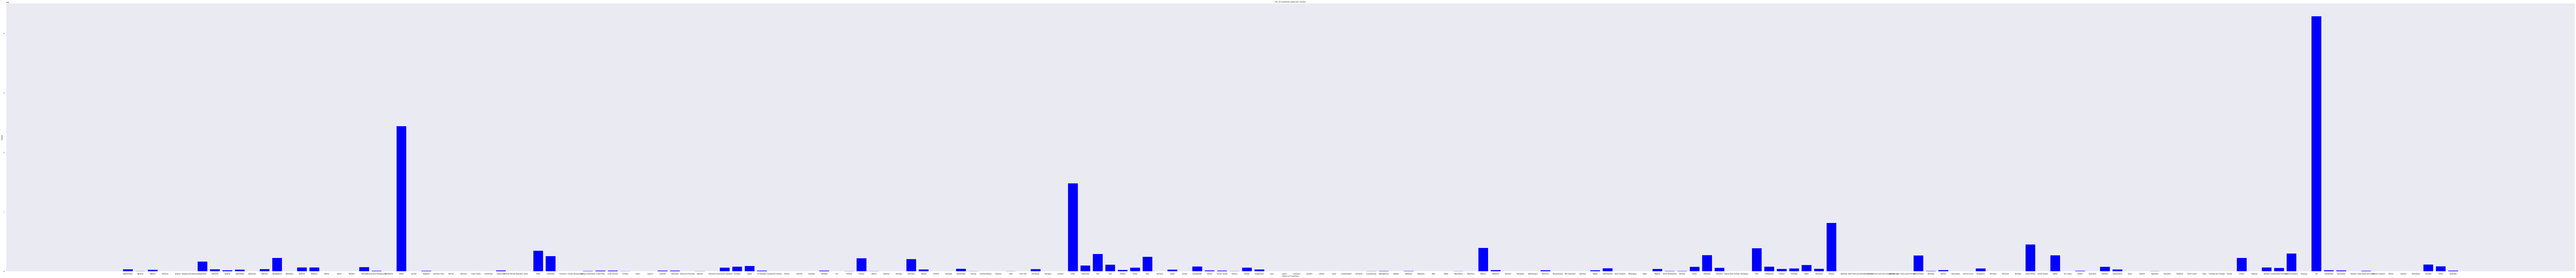

In [301]:
plt.figure(figsize=(280,30))
plt.bar(details['Country'], details['Confirmed'],color='blue')
plt.xlabel("Name of Countries")
plt.ylabel("Cases")
plt.title("No. of confirmed cases per country")

### Observation from the above graphs:-
* *United States of America* recorded the highest number of confirmed cases.
* *Brazil* recorded the highest recovery rate in the world.
* *United States of America* recorded the highest number of deaths due to COVID-19.

<AxesSubplot:xlabel='date'>

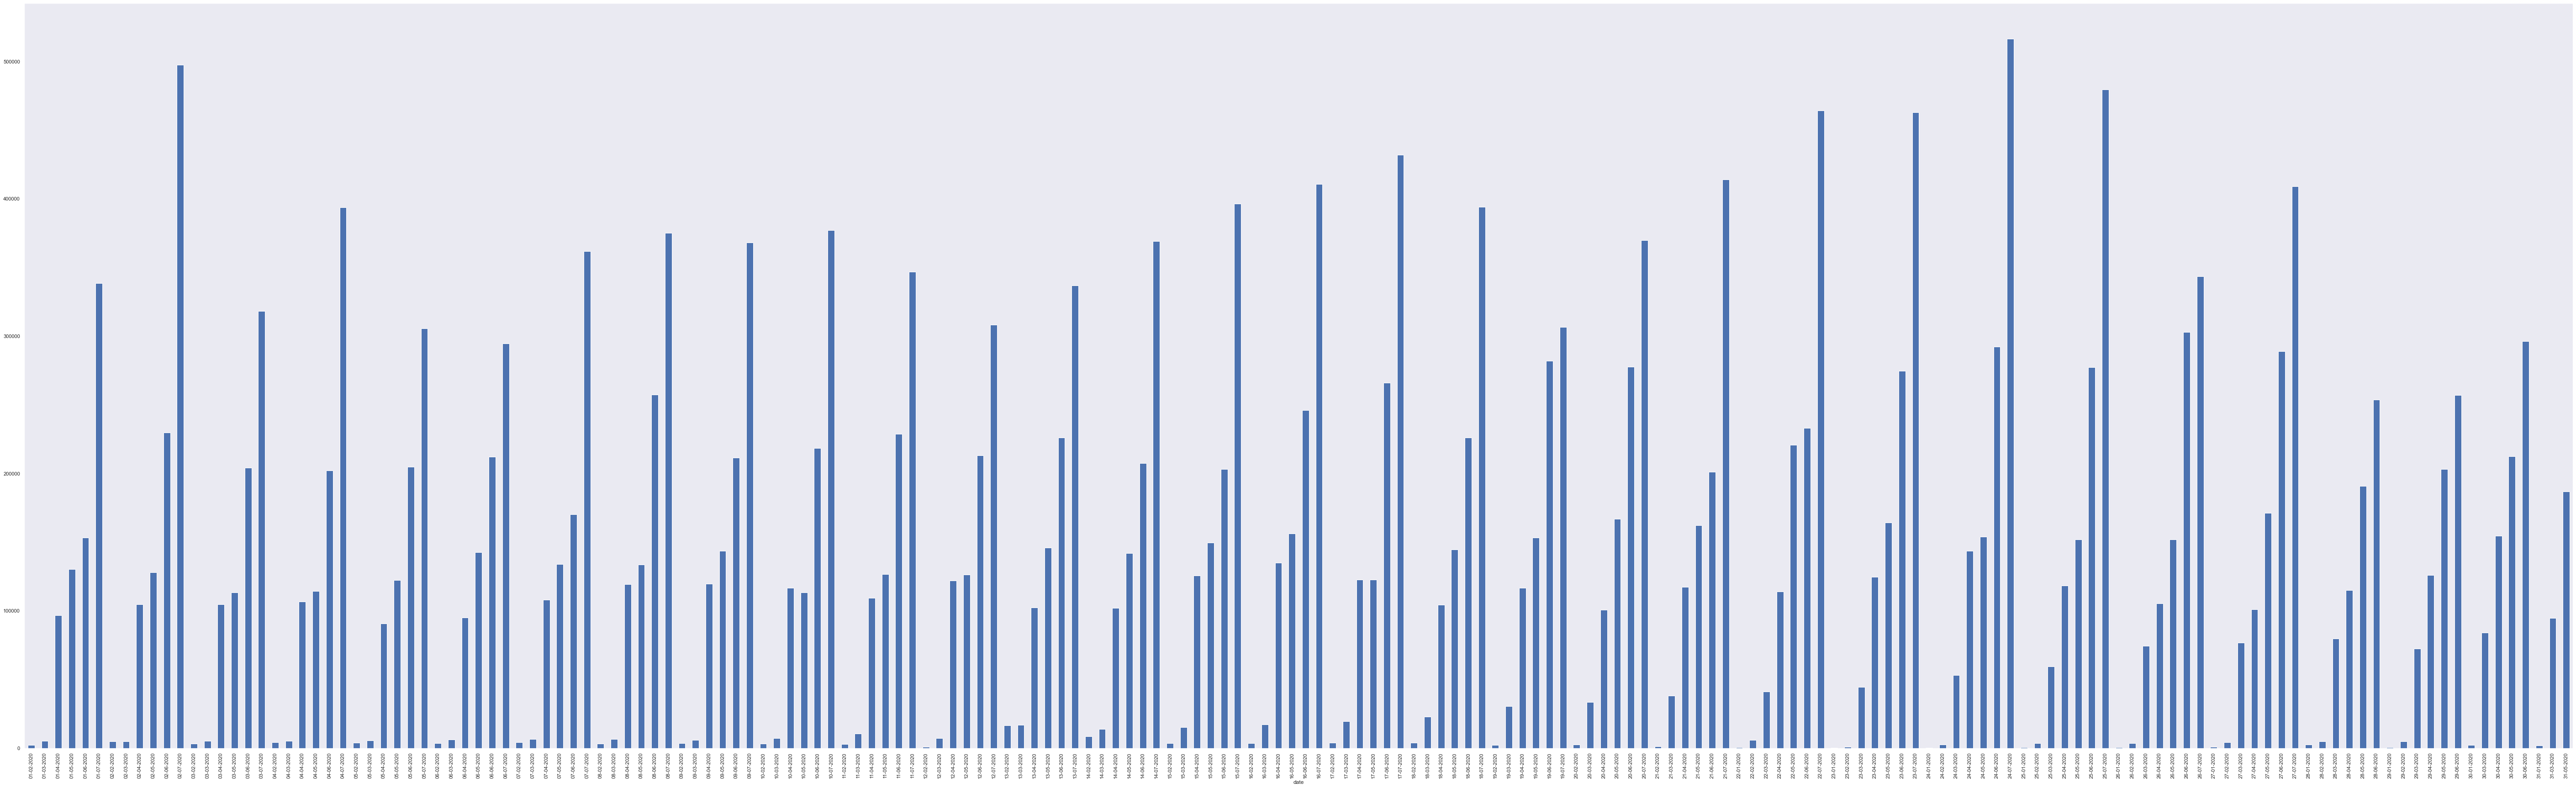

In [310]:
data.groupby('date')['cases'].sum().plot(kind='bar',figsize=(100,30))

The graph above plots the number of cases and the dates of each month in a numerical order.

### Observation from the graph:-
* An interesting finding from the above graph is that most cases were recorded on the *2nd date of every month*.
* There is always a regular trend of increase in number of cases per month, which is shown by the similar looking bars in equal intervals.

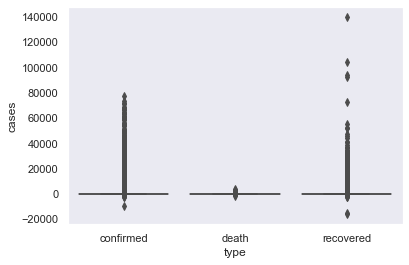

In [325]:
box1=sns.boxplot(x='type',y='cases',data=data)

A boxplot showing the whisker, Q1, Q3 and median values of type of cases.

### Conclusion

This EDA can help us come to the conclusion that: The regions in the torrid zone were the most affected with COVID-19, a lot of cases were consistently recorded on the 2nd of every month. USA, Brazil, and India were the top 3 most affected countries in the world. There was a spike in number of cases between June and July and the death rate of this disease is quite low.